I'm not familiar with this kind of table, so I wrote it by referring to someone else's notebook, and some of it was modified.

referenced notebook:
* https://www.kaggle.com/niteshyadav3103/eda-e-commerce-shipping-data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('../data/customer-analytics/Train.csv')

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

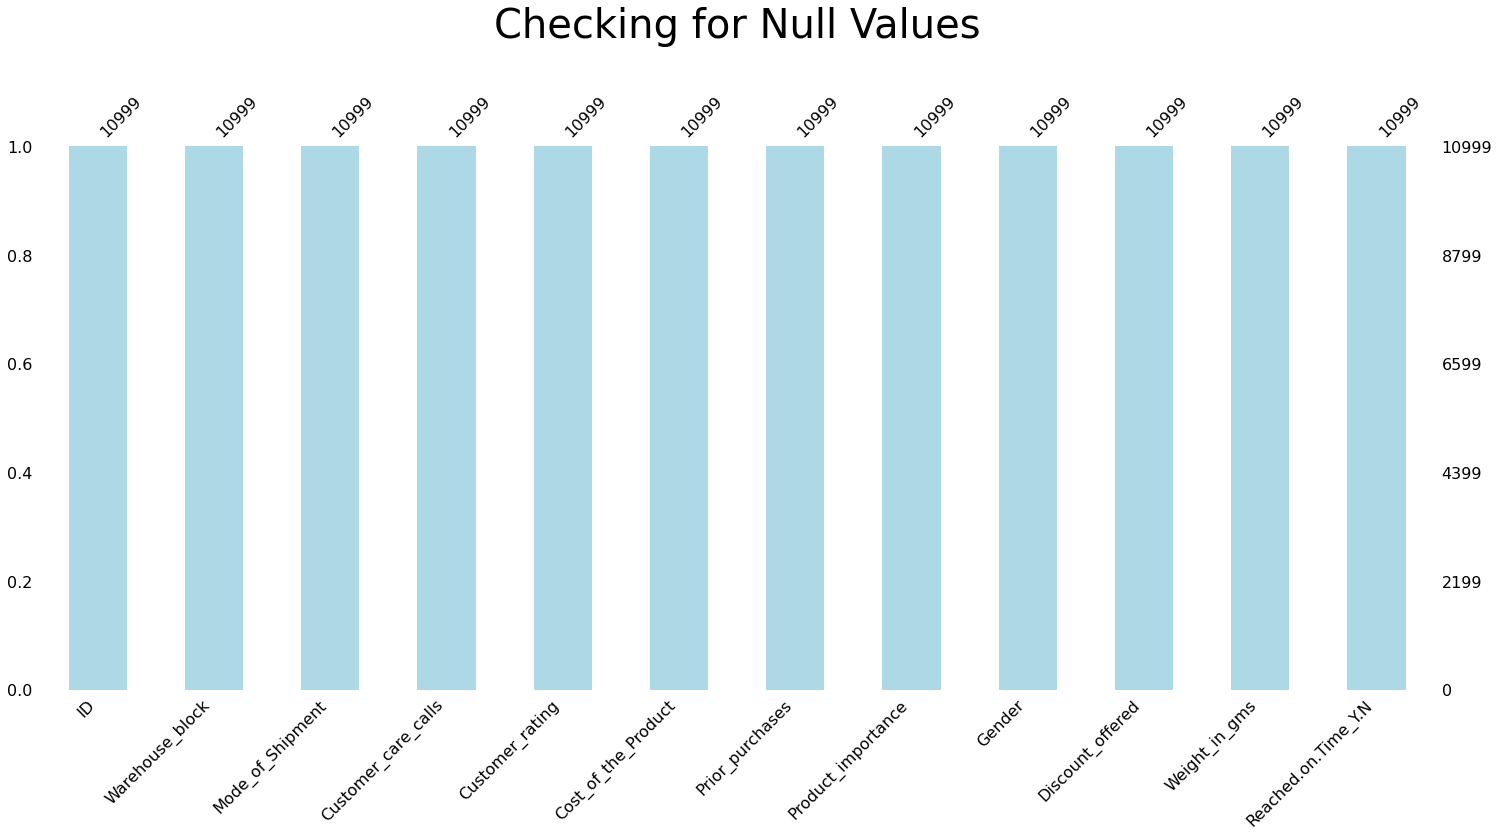

In [7]:
# checking for null values using `missingno` module
# `msno.matrix` : It is convenient to know the distribution of missing values.
# `msno.bar` : It is convenient to know the total number of missing values.


import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()

This dataframe has no missing values.

In [8]:
# dropping unwanted column using drop method

df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# correlation

In [9]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [10]:
# Since the purpose of this data is to predict whether or not it will Reach on time, 
# we calculate the Correlation of the Reached_on_Time column.
df.corr()['Reached.on.Time_Y.N'].sort_values()

Weight_in_gms         -0.268793
Cost_of_the_Product   -0.073587
Customer_care_calls   -0.067126
Prior_purchases       -0.055515
Customer_rating        0.013119
Discount_offered       0.397108
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

`Discount_offered` have high positive correlation with **`Reached on Time or not`** of 40%

<AxesSubplot:>

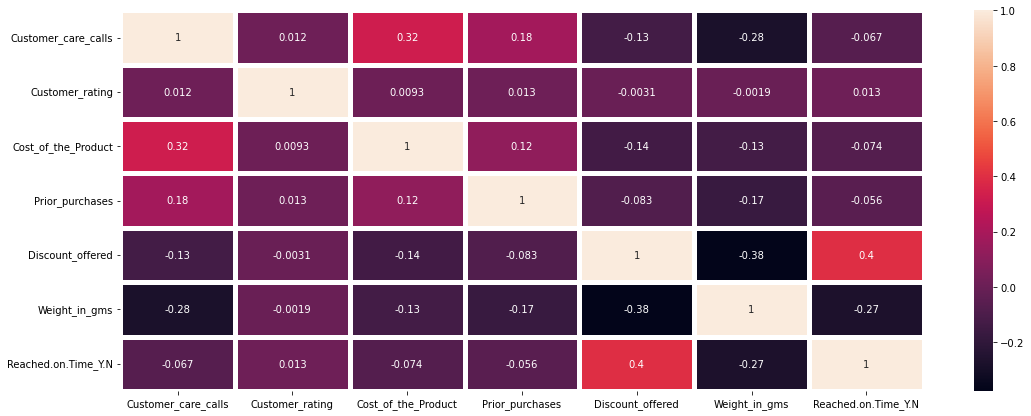

In [11]:
# heatmap of the data for checking the correlation between the features and target column.
# sns.heatmap()
# annot : If `True`, write the data value in each cell.

plt.figure(figsize=(18, 7))
sns.heatmap(df.corr(), annot=True, linewidth=5, linecolor='white')

`Discount_Offered` and `weight_in_grams` have negative correlation -38%.

`Weights_in_gram` have negative correlation with **`Reached.on.Time_Y.N`** -27%.

`Customer_care_calls` and `Cost_of_the_Product` have positive correlation 32%

Since we need to pay attention to the relationship of other columns to the **`Reached.on.Time_Y.N`** column, we analyze the column with high correlation with that column.

## `Discount_Offered`

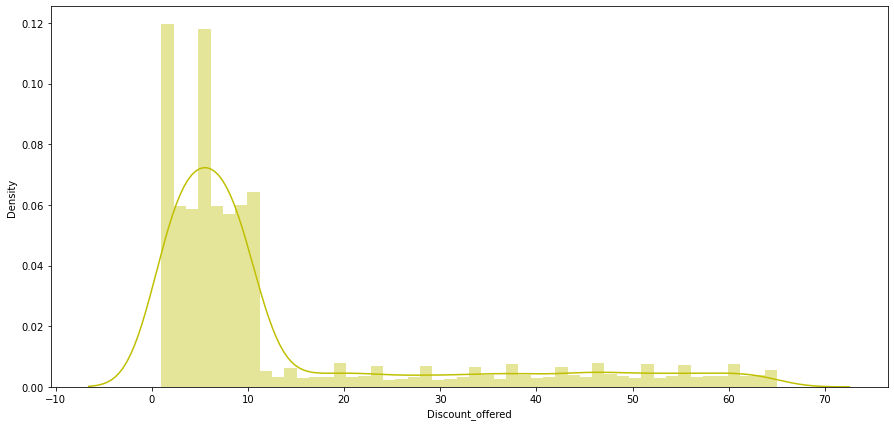

In [12]:
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'y')

plt.show()

In [13]:
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

## `Weights in Grams`

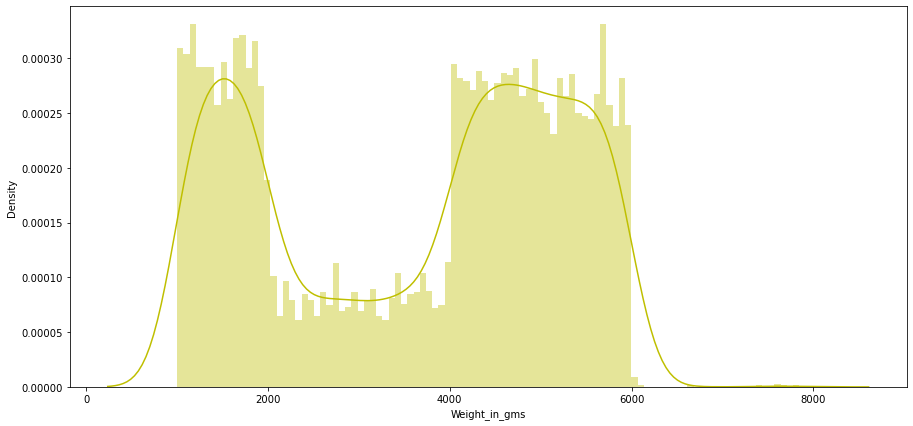

In [14]:
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Weight_in_gms'], bins = 100, color = 'y')

plt.show()

In [15]:
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

# Categorical Data

In [16]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender']
criterion_col = 'Reached.on.Time_Y.N'

<AxesSubplot:>

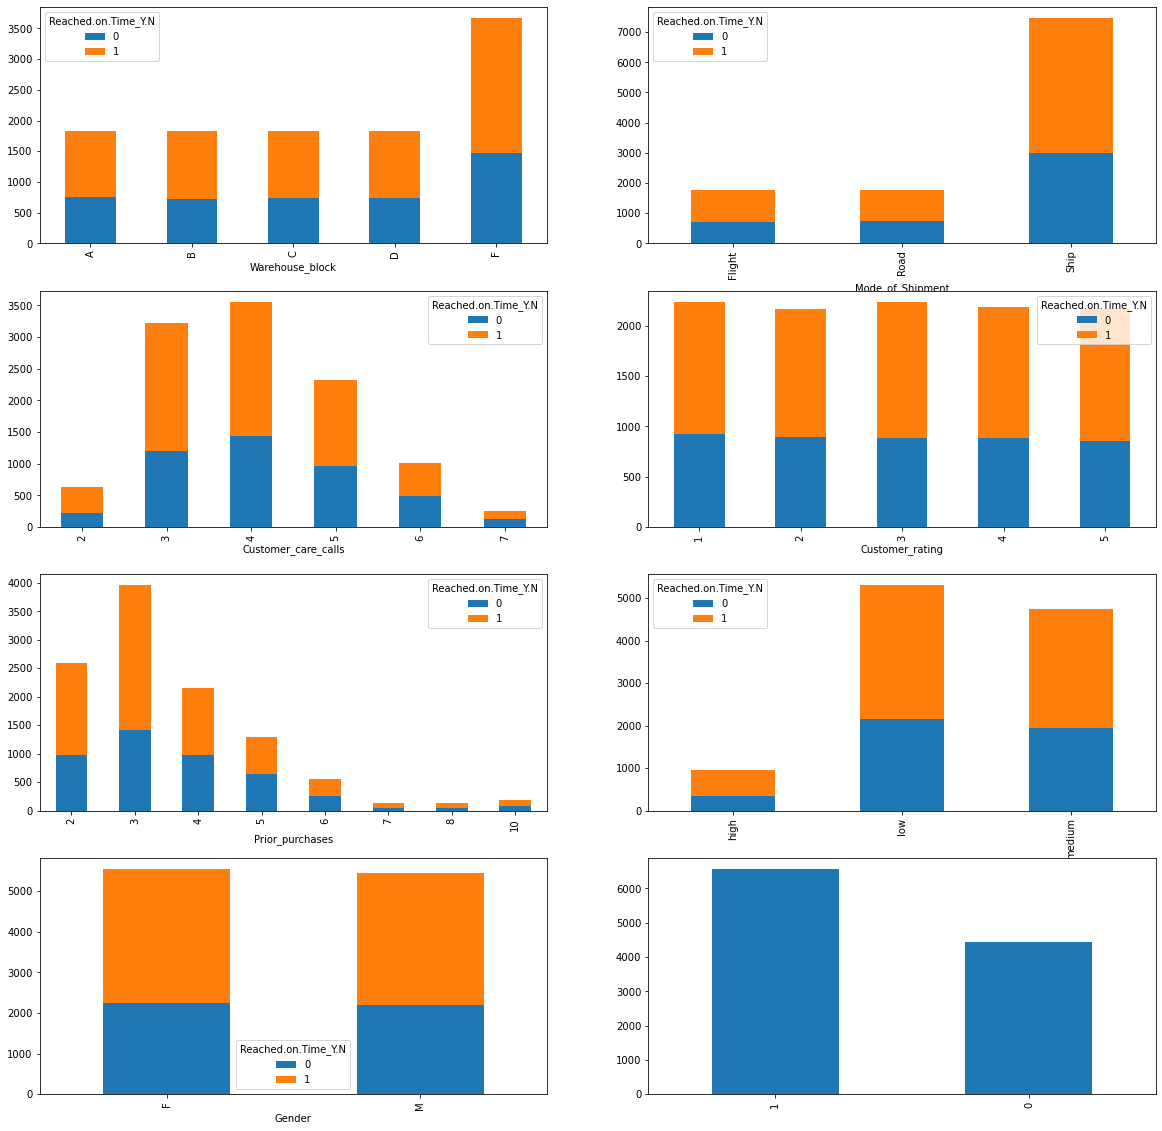

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
for i in range(len(categorical_cols)):
    df_chart = pd.concat([df[[categorical_cols[i]]], df[[criterion_col]]], axis=1)
    df_chart_group = df_chart.groupby([categorical_cols[i], criterion_col])[categorical_cols[i]].count().unstack(criterion_col)
    df_chart_group.plot(kind='bar', stacked=True, ax=axes[i//2, i % 2])

df[criterion_col].value_counts().plot(kind='bar', ax=axes[3, 1])


I made a stacked bar chart to figure out the distribution of 0 and 1 in each bar, but the visibility doesn't seem to be good.

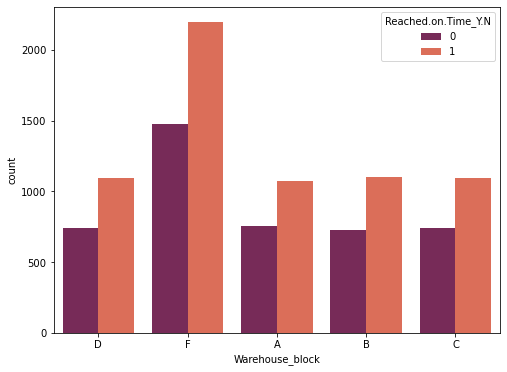

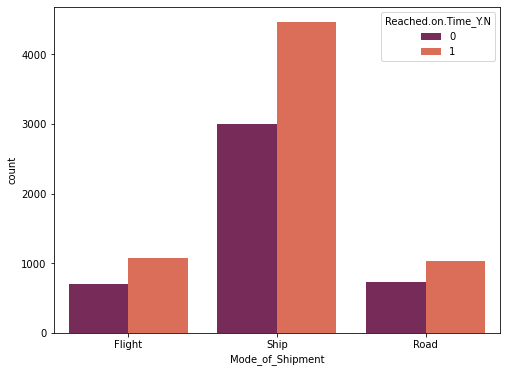

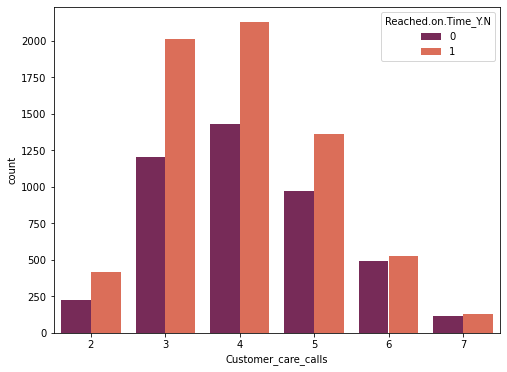

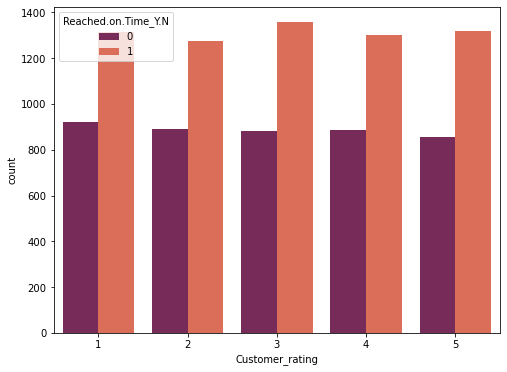

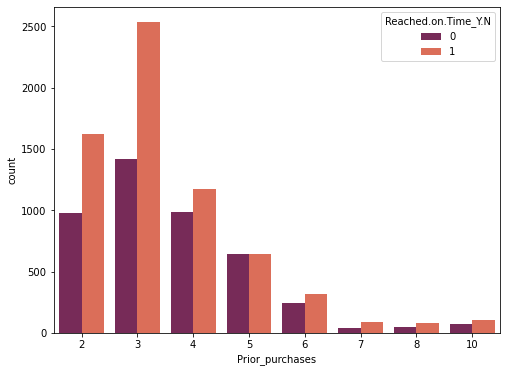

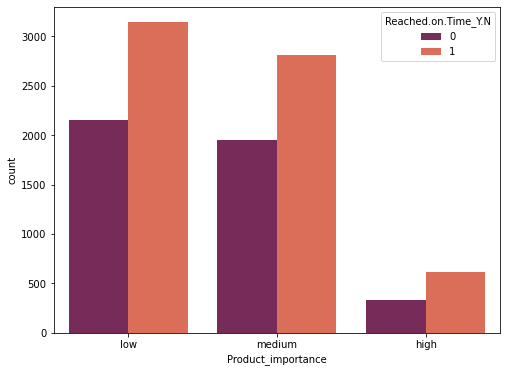

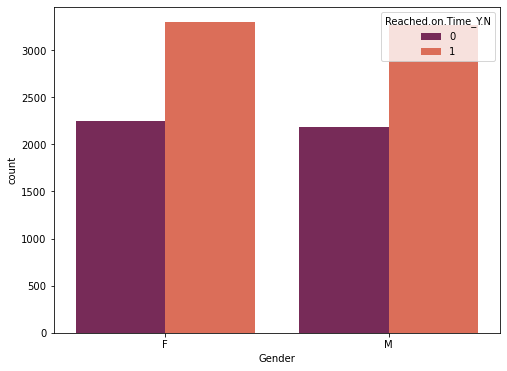

In [18]:
for col in categorical_cols:
    df_count = df[col].value_counts().reset_index()
    df_count.columns = [col, 'value_counts']
    fig = px.pie(df_count, names = col, values = 'value_counts',
                color_discrete_sequence = px.colors.sequential.matter_r, 
                width = 650, height = 400, hole = 0.5, title=col)
    fig.update_traces(textinfo = 'percent+label')
    fig.show()
    plt.figure(figsize = (8, 6))
    sns.countplot(col, hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
    plt.show()